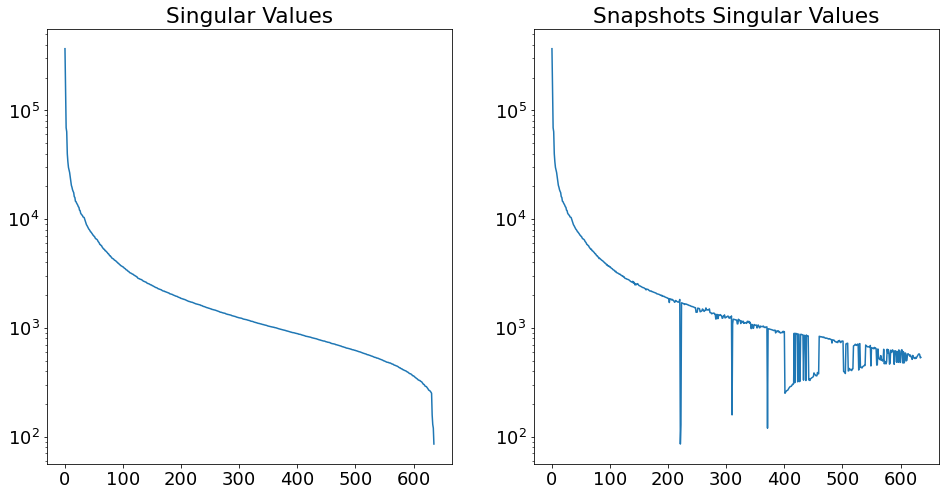

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

X = np.array(faces[:,:np.sum(nfaces[:10])],dtype=np.float64)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S=np.diag(S)

X_corr = np.dot(X.T, X)
w,v = np.linalg.eig(X_corr)
s=np.diag(np.sqrt(w))
u = X @ v @ np.linalg.inv(s)

fig = plt.figure(figsize=(16, 8))
gs = plt.GridSpec(nrows=1, ncols=2)

ax1=fig.add_subplot(gs[0,0])
ax1.semilogy(np.diag(S))
ax1.set_title('Singular Values')

ax2=fig.add_subplot(gs[0,1])
ax2.semilogy(np.diag(s))
ax2.set_title('Snapshots Singular Values')
plt.show()

First 10 Left Singular Vectors Using Regular Method:


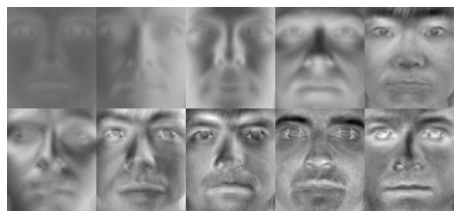

First 10 Left Singular Vectors Using Snapshots Method:


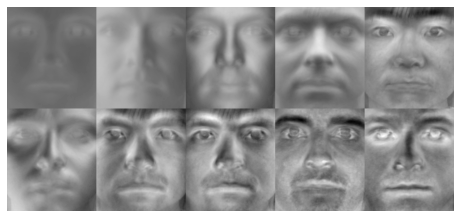

In [60]:
print('First 10 Left Singular Vectors Using Regular Method:')
allPersons = np.zeros((n*2,m*5))
count=0

for j in range(2):
    for k in range(5):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(U[:,count],(m,n)).T
        count += 1
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')   
plt.show()

count=0
print('First 10 Left Singular Vectors Using Snapshots Method:')
for j in range(2):
    for k in range(5):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(u[:,count],(m,n)).T
        count += 1
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')   
plt.show()

100th-110th Left Singular Vectors Using Regular Method:


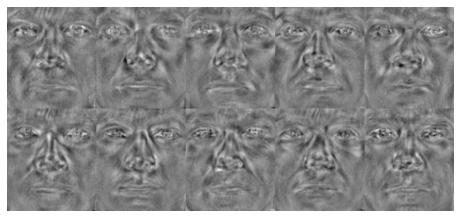

100th-110th Left Singular Vectors Using Snapshots Method:


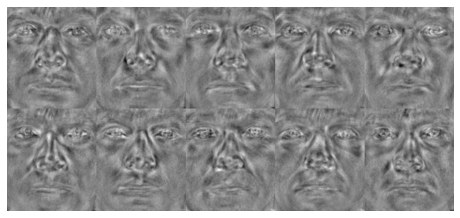

In [66]:
print('100th-110th Left Singular Vectors Using Regular Method:')
allPersons = np.zeros((n*2,m*5))
count=100

for j in range(2):
    for k in range(5):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(U[:,count],(m,n)).T
        count += 1
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')   
plt.show()

count=100
print('100th-110th Left Singular Vectors Using Snapshots Method:')
for j in range(2):
    for k in range(5):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(u[:,count],(m,n)).T
        count += 1
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')   
plt.show()

Sign differences between the left singular vectors from the two different methods or calculation errors could be the reason why the eigenfaces in the two methods are slightly different.